# Rayleigh-Taylor instability of a Darcy fluid

In [1]:
import numpy as np
from lucifex.fdm import AB2, CN
from lucifex.sim import run, xdmf_to_npz
from lucifex.viz import plot_colormap, create_animation, plot_line, save_figure, display_animation, get_ipynb_file_name
from crocodil.dns import dns_darcy_rayleigh_taylor

STORE = 1
WRITE = None
DIR_BASE = f'./data_{get_ipynb_file_name()}'
DIR_PARAMS = ('Ra', 'Nx', 'Ny')

simulation = dns_darcy_rayleigh_taylor(
    store_delta=STORE, 
    write_delta=WRITE, 
    dir_base=DIR_BASE, 
    dir_params=DIR_PARAMS,
)(
    aspect=2.0,
    Nx=64,
    Ny=64,
    cell='quadrilateral', 
    scaling='advective',
    Ra=5e2,
    h0=0.5,
    h0_eps=5e-2,
    c_ampl=1e-6,
    c_freq=(16, 8),
    dt_max=0.1,
    cfl_courant=0.5,
    D_adv=AB2,
    D_diff=CN,
    diagnostic=True,
)

n_stop = 300
dt_init = 0.05
n_init = 10
run(simulation, n_stop=n_stop, dt_init=dt_init, n_init=n_init)

if WRITE:
    xdmf_to_npz(simulation, delete_xdmf=False)

c, u, psi = simulation['c', 'u', 'psi']

In [2]:
time_slice = slice(0, None, 2)
titles = [f'$c(t={t:.3f})$' for t in c.time_series[time_slice]]

anim = create_animation(
    plot_colormap,
    colorbar=False,
)(c.series[time_slice], title=titles)
anim_path = save_figure(f'{c.name}(t)', simulation.dir_path, get_path=True)(anim)

display_animation(anim_path)

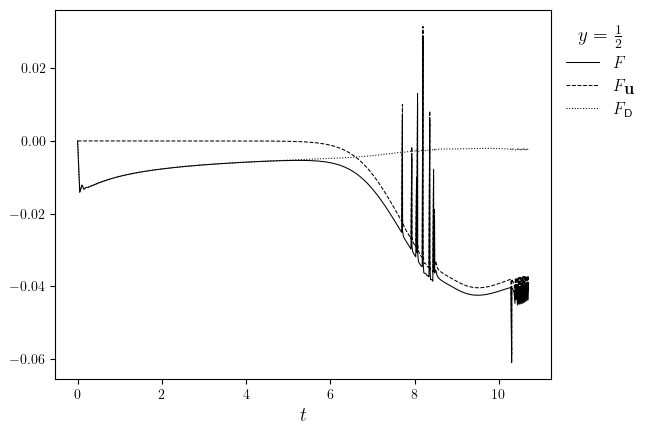

In [3]:
f = simulation['f']
f, fPlus, fMinus = f.split()

fig, ax = plot_line(
    [(f.time_series, [np.sum(i) for i in f.value_series]), (f.time_series, f.value_series)],
    cyc='black',
    x_label='$t$',
    legend_labels=['$F$', '$F_{\\textbf{u}}$', '$F_{\mathsf{D}}$'],
    legend_title='$y=\\frac{1}{2}$',
)
save_figure('f(t)', simulation.dir_path, prefix_ipynb=False)(fig)